In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../..')
#sys.path.append( '/home/cactuskid13/miniconda3/pkgs/')
print(sys.path)

['/scratch/dmoi/projects/HogProf/pyprofiler/notebooks', '/scratch/dmoi/condaenvs/ML2/lib/python39.zip', '/scratch/dmoi/condaenvs/ML2/lib/python3.9', '/scratch/dmoi/condaenvs/ML2/lib/python3.9/lib-dynload', '', '/scratch/dmoi/condaenvs/ML2/lib/python3.9/site-packages', '/scratch/dmoi/software/pyham', '/scratch/dmoi/condaenvs/ML2/lib/python3.9/site-packages/IPython/extensions', '/users/dmoi/.ipython', '../..']


In [2]:
#idea! try graph net on the species tree with the same approach as covid
#predict connection nodes and score on the human result


#hilbert space analysis?

#try blurring approach with species tree connectivity mat



In [3]:
#using the profiler. It's easy!
#lets import the profiler, configuration file and some tools for GO analysis to look at our returned results
from pyprofiler.utils import config_utils
import pyprofiler.utils.goatools_utils as goa
import pyprofiler.utils.hashutils as hashutils
import seaborn as sns

import pyprofiler.profiler as profiler
import pandas as pd
import numpy as np

{'dir': {'datadir': '/scratch/dmoi/datasets/birds/', 'omadir': '/scratch/dmoi/datasets/birds/'}, 'orthoxmltar': '', 'email': 'dmoi@unil.ch'}


/scratch/dmoi/condaenvs/ML2/lib/python3.9/site-packages/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if line is '\n':


In [4]:
#lets load a compiled db containing the OMA root HOGs into a profiler oject 
p = profiler.Profiler(lshforestpath = '/scratch/dmoi/datasets/all/newlshforest.pkl' , hashes_h5='/scratch/dmoi/datasets/birds/all/hashes.h5' , mat_path= None, oma = '/scratch/dmoi/datasets/OMA/apr2021/OmaServer.h5', tar= None , nsamples = 256 , mastertree = '/scratch/dmoi/datasets/birds/all_test_master_tree.pkl')

loading lsh
indexing lsh


/scratch/dmoi/condaenvs/ML2/lib/python3.9/site-packages/tables/leaf.py:367: PerformanceWarning: The Leaf ``/Protein/_i_Entries/OmaHOG/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  warnings.warn("""\


3508
DONE


In [5]:
def grabHog(ID, verbose = True):
    try:
        entry = p.db_obj.entry_by_entry_nr(p.db_obj.id_resolver.resolve(ID))
        return entry[4].decode() , entry
    except:
        return np.nan,np.nan
#map to OMA HOGs

In [6]:
#load humap data
humap = '/scratch/dmoi/datasets/humap_PPI/humap2_ppis_ACC_20200821.pairsWprob'
df = pd.read_table(humap, header = None)
print(df)

                  0                1             2
0            P46926           Q8TDQ7  1.000000e+00
1            P43631           Q14954  1.000000e+00
2            P43631           Q14953  1.000000e+00
3            P43631           P43629  1.000000e+00
4         100287045           Q86YD7  1.000000e+00
...             ...              ...           ...
17526306     Q9H6Z4           Q7L1Q6  3.000000e-14
17526307     Q9Y265           P54578  3.000000e-14
17526308     P16152           P04406  3.000000e-14
17526309     Q96AE4           P78417  3.000000e-14
17526310     P20042  ENSG00000180574  3.000000e-14

[17526311 rows x 3 columns]


In [7]:
#filter to 90%proba
df = df[df[2] > .75 ]
print(len(df))
mapper = set( list(df[1]) + list(df[0]) )
mapper = { protid: grabHog(protid) for protid in mapper }
df['hog1'] = df[1].map(mapper)
df['hog2'] = df[0].map(mapper)
print(df)

8981


/scratch/dmoi/condaenvs/ML2/lib/python3.9/site-packages/tables/leaf.py:367: PerformanceWarning: The Leaf ``/_i_XRef/XRefId/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  warnings.warn("""\


              0       1         2  \
0        P46926  Q8TDQ7  1.000000   
1        P43631  Q14954  1.000000   
2        P43631  Q14953  1.000000   
3        P43631  P43629  1.000000   
4     100287045  Q86YD7  1.000000   
...         ...     ...       ...   
8976     P12524  Q6P597  0.750250   
8977     P28074  Q99460  0.750249   
8978     P78537  Q96GS4  0.750214   
8979     O14972  O60826  0.750171   
8980     Q9Y244  P20618  0.750156   

                                                   hog1  \
0     (HOG:A0786418.3b.3a.6b.7b.3a.5a.1a, [10509897,...   
1     (HOG:A0495961.1b.4c.1b, [10480506, 4099522525,...   
2     (HOG:A0495961.1b.4c.1a, [10480505, 4099522183,...   
3     (HOG:A0495961.1a.1b, [10480515, 4099525487, 44...   
4     (HOG:A0498062.5c, [10445481, 4087452873, 465, ...   
...                                                 ...   
8976  (HOG:A0552037.1b, [10478826, 4099019790, 505, ...   
8977  (HOG:A0563496.5a.4a.3b.7a.8b, [10501895, 41083...   
8978  (HOG:A0501712.1a, 

In [ ]:
df['hogid_1'] = df['hog1'].map(lambda x:x[0])
df['hogid_2'] = df['hog2'].map(lambda x:x[0])
df = df.dropna()
print(len(df))

In [ ]:
print(df.iloc[0].hog1)
df['fam1'] = df['hog1'].map( lambda x :   p.hogid2fam(x[1]) )
df['fam2'] = df['hog2'].map( lambda x :   p.hogid2fam(x[1]) ) 
df = df.dropna()
df.fam1 = df.fam1.map(int)
df.fam2 = df.fam2.map(int)
print(df)

In [ ]:
print(len(df))

In [ ]:
df.to_csv(humap+'hogmapped.csv')

In [ ]:
#save with mapped ids
import scipy
import dendropy
from matplotlib import pyplot as plt
species_tree = p.tree
with open('species_tree.nwk', 'w')as treeout:
    treeout.write( species_tree.write())
tree = dendropy.Tree.get( path='species_tree.nwk', schema='newick')
for i,n in enumerate(tree.nodes()):
    n.matrow = i
    n.symbols = None
    n.scores = None
    n.event = None
    n.char = None

matsize = len(tree.nodes())
print(matsize)
print('nodes')
#blur w connectivity mat
blurfactor =  .25
connectmat = scipy.sparse.lil_matrix((len(tree.nodes()), len(tree.nodes() ) ) )
index = np.array([ [n.matrow, c.matrow ] for n in tree.nodes() for c in n.child_nodes()])
connectmat[index[:,0],index[:,1]] = 1
connectmat[index[:,1],index[:,0]] = 1
sumlengths = connectmat.sum(axis=1)
#diag= scipy.sparse.diags(1,[0])
#connectmat += diag
connectmat = scipy.sparse.coo_matrix(connectmat)
plt.figure( figsize=(10,10))
plt.title( 'NCBI taxonomic tree connectivity matrix ' )
plt.spy(connectmat, markersize= 1)
plt.show()

In [ ]:
#create data for our explicit comparisons
from pyprofiler.utils import hashutils
import ete3
allhogs = set([])
[allhogs.add( h ) for h in df.fam1.unique()]
[allhogs.add( h ) for h in df.fam2.unique()]
print(len(allhogs))

In [ ]:
profiles = {}


for fam in allhogs:
    print(fam)
    try:
        prof = p.return_profile_OTF(fam)
    except:
        print('err', fam)
    print(prof)
    profiles.update(prof)
    
    

'''
explicit_profiles = p.retmat_mp_profiles( allhogs , nworkers= 20 , verbose = False )

'''



In [ ]:
with open(humap + 'gold_standard_profiles.pkl' , 'wb') as profiles_out:
    profiles_out.write(pickle.dumps(profiles))

    


In [ ]:
print(explicit_profiles)

In [10]:
import dask
from dask import dataframe as dd
df = dd.read_csv('/scratch/dmoi/datasets/STRING/COG.links.detailed.v11.5.txt', blocksize=25e6 , header = 0, sep = ' ')

In [11]:
print(df)
print(df.columns)

Dask DataFrame Structure:
                 group1  group2 neighborhood fusion cooccurence coexpression experimental database textmining combined_score
npartitions=195                                                                                                             
                 object  object        int64  int64       int64        int64        int64    int64      int64          int64
                    ...     ...          ...    ...         ...          ...          ...      ...        ...            ...
...                 ...     ...          ...    ...         ...          ...          ...      ...        ...            ...
                    ...     ...          ...    ...         ...          ...          ...      ...        ...            ...
                    ...     ...          ...    ...         ...          ...          ...      ...        ...            ...
Dask Name: read-csv, 195 tasks
Index(['group1', 'group2', 'neighborhood', 'fusion', 'cooccurence',


In [12]:
dropcols = ['neighborhood', 'fusion', 'cooccurence', 'combined_score' ]
df = df.drop(columns = dropcols)

df['score'] = df.coexpression + df.experimental +df.database+ df.textmining


In [13]:
h, bins = dask.array.histogram(df.score,bins=20, range=[0, 5000])
h = h.compute()


In [14]:
print(h,bins)

[115479844   7352936   2295808    955128    217648    108728     62692
     41052     20172     15904     13516     10340      5112      3516
      2460       760         0         0         0         0] [   0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250. 2500. 2750.
 3000. 3250. 3500. 3750. 4000. 4250. 4500. 4750. 5000.]


/tmp/4163888/ipykernel_708605/2148639131.py:3: RuntimeWarning: divide by zero encountered in log
  plt.bar(bins[:-1],np.log(h),width=500)


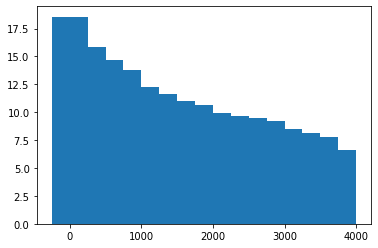

In [15]:
from matplotlib import pyplot as plt
import numpy as np
plt.bar(bins[:-1],np.log(h),width=500)
plt.show()

In [16]:
df= df[df.score>2000]
print(len(df))
df= df.compute()

71680


In [17]:
grabcogs = set( list(df.group1.unique()) + list(df.group2.unique()) )

In [27]:
grabcogs= list(grabcogs)

In [28]:
print(len(grabcogs), grabcogs[0:100])

4866 ['COG1163', 'COG2051', 'KOG0822', 'KOG2340', 'NOG258475', 'COG5133', 'NOG258020', 'COG5143', 'NOG06884', 'COG2023', 'NOG231554', 'NOG23381', 'KOG0598', 'COG3705', 'KOG2609', 'KOG3026', 'NOG283576', 'COG1588', 'KOG2265', 'NOG84241', 'NOG246086', 'NOG23389', 'KOG0297', 'KOG2669', 'NOG236509', 'NOG131411', 'NOG257719', 'KOG3202', 'NOG00701', 'KOG0608', 'KOG4748', 'COG3833', 'COG5084', 'NOG18079', 'KOG2279', 'NOG05807', 'NOG10940', 'COG4890', 'NOG17879', 'KOG0812', 'NOG04185', 'COG3515', 'NOG270167', 'NOG89573', 'COG3117', 'COG0821', 'COG2388', 'NOG02081', 'NOG02195', 'KOG1882', 'NOG07543', 'NOG38949', 'NOG01887', 'COG0377', 'NOG02389', 'NOG269946', 'COG0279', 'NOG244501', 'NOG14253', 'NOG22047', 'COG1380', 'COG3121', 'NOG273129', 'KOG1689', 'KOG3802', 'NOG250312', 'NOG282895', 'NOG04751', 'NOG254856', 'NOG38047', 'COG0153', 'COG2854', 'NOG17320', 'COG3736', 'NOG28786', 'COG4790', 'KOG4034', 'NOG272017', 'NOG55186', 'KOG3263', 'NOG08704', 'COG1282', 'COG0173', 'NOG07859', 'COG3497', '

In [29]:
#map the interacting cogs to the proteins
COGmapings_df = dd.read_csv('/scratch/dmoi/datasets/STRING/COG.mappings.v11.5.txt', blocksize=25e6 , header = 0, sep = '\t')
COGmapings_df = COGmapings_df.set_index('orthologous_group')
COGmapings_df = COGmapings_df.loc[grabcogs]
print(COGmapings_df.head())

                                       ##protein  start_position  \
orthologous_group                                                  
COG0017                  1000570.HMPREF9966_0692               1   
COG0017                  1000588.HMPREF9965_1653               1   
COG0017                       1001240.GY21_12350               1   
COG0017            1001530.BACE01000011_gene1967               1   
COG0017                 1002367.HMPREF0673_01245               1   

                   end_position  \
orthologous_group                 
COG0017                     448   
COG0017                     447   
COG0017                     442   
COG0017                     466   
COG0017                     472   

                                                  protein_annotation  
orthologous_group                                                     
COG0017            Asparagine--tRNA ligase; Identified by match t...  
COG0017            Asparagine--tRNA ligase; Identified by match 

In [31]:
#only take the proteins in our cogs of interest
COGmapings_df = COGmapings_df.compute()
grabprots =list(COGmapings_df['##protein'].unique())
print(len(grabprots))

4278995


In [34]:
with open('/scratch/dmoi/datasets/STRING/COG.links.detailed.v11.5.txt' + '.grabcogs.txt', 'w') as protsout:
    protsout.write(''.join([ p + '\n' for p in grabcogs ]) )
    
with open('/scratch/dmoi/datasets/STRING/COG.mappings.v11.5.txt' + '.grabprots.txt' , 'w') as protsout:
    protsout.write(''.join([ p + '\n' for p in grabprots ]) )

In [44]:

from dask.distributed import Client, Variable , Queue , Lock ,LocalCluster
from dask_jobqueue import SLURMCluster


NCORE = 10
njobs = 20
print('deploying cluster')
cluster = SLURMCluster(
    walltime='24:00:00',
    n_workers = NCORE,
    cores=NCORE,
    processes = NCORE,
    interface='ib0',
    memory="400GB",
    env_extra=[
    'source /scratch/dmoi/miniconda/etc/profile.d/conda.sh',
    'conda activate ML2'
    ],
    scheduler_options={'interface': 'ens2f0' }
)
print(cluster.job_script())
#cluster.adapt(minimum=10, maximum=30)
cluster.scale(jobs=20)
print(cluster)
print(cluster.dashboard_link)
client = Client(cluster , timeout='450s' , set_as_default=True )

deploying cluster
#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -n 1
#SBATCH --cpus-per-task=10
#SBATCH --mem=373G
#SBATCH -t 24:00:00
source /scratch/dmoi/miniconda/etc/profile.d/conda.sh
conda activate ML2
/scratch/dmoi/condaenvs/ML2/bin/python -m distributed.cli.dask_worker tcp://10.203.100.112:37567 --nthreads 1 --nprocs 10 --memory-limit 37.25GiB --name dummy-name --nanny --death-timeout 60 --interface ib0 --protocol tcp://

SLURMCluster(4fd4807c, 'tcp://10.203.100.112:37567', workers=0, threads=0, memory=0 B)
http://10.203.100.112:40047/status


/scratch/dmoi/condaenvs/ML2/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40047 instead
  warnings.warn(


In [45]:
#find which species each of the cogs has an interaction in
link_df = dd.read_csv('/scratch/dmoi/datasets/STRING/protein.links.full.v11.5.txt', blocksize=25e6 , header = 0, sep = ' ')
print(link_df)

Dask DataFrame Structure:
                  protein1 protein2 neighborhood neighborhood_transferred fusion cooccurence homology coexpression coexpression_transferred experiments experiments_transferred database database_transferred textmining textmining_transferred combined_score
npartitions=61621                                                                                                                                                                                                                                             
                    object   object        int64                    int64  int64       int64    int64        int64                    int64       int64                   int64    int64                int64      int64                  int64          int64
                       ...      ...          ...                      ...    ...         ...      ...          ...                      ...         ...                     ...      ...                  ...    

In [46]:
link_df['score'] = link_df.coexpression + link_df.experiments +link_df.database+ link_df.textmining

In [ ]:
link_df = link_df.set_index('protein1')

In [ ]:
link_df = link_df.loc[grabprots]

In [ ]:
link_df = link_df.set_index('protein2')
link_df = link_df.loc[grabprots]

In [ ]:
print(len(link_df))
link_df = link_df.compute()
#output the smallerdf
link_df.to_csv('/scratch/dmoi/datasets/STRING/protein.links.full.v11.5.txt'+'filtered.txt')

In [ ]:
#open up string data

#map HOGs to string COGs

#Find COGs with physicallink_dfression interaction data 

#filter for physical interaction quality and remove interlogs

#

In [ ]:
#find min subtree for two interactors

#only label the subtree as subgraph

#fitch the ancestral states

#when one is absent the state in 0

In [ ]:
import ete3
taxonomy = p.tree


taxindex ={ n:i for i,n in enumerate(taxonomy.traverse())}
reverse ={ i:n for i,n in enumerate(taxonomy.traverse())}


In [ ]:
pip install keract

In [ ]:
#mapfam to matrow
fam_map= { f:i for i,f in enumerate(explicit_profiles.index)}
profilemat = np.vstack(explicit_profiles.mat)
print(profilemat.shape)

In [ ]:


print(len(allhogs))
#filter out the entries in sub that don't have a profile

sub=sub[ sub.fam1.isin(fam_map) & sub.fam2.isin(fam_map)]
df = df[ df.fam1.isin(fam_map) & df.fam2.isin(fam_map)]

print(len(sub))


In [ ]:
#use all of the gold standard to train and use the subnet to quantify
import itertools

def chunks(df, n):
    for i in range(0, len(df), n):
        yield df.iloc[i:i + n]
        
def generateXYchunk(explicit_profiles, goldstandardDF,  nsamples=100, posi_percent = .5):
    #shuffle
    goldstandardDF = goldstandardDF.sample(frac=1)
    for chunkdf in chunks(goldstandardDF , int( nsamples*posi_percent)):
        #negatives drawn from the overall dataset
        X = np.hstack([ np.vstack([profilemat[fam_map[f]] for f in chunkdf.fam1]) , np.vstack([profilemat[fam_map[f]] for f in chunkdf.fam2]) ] )
        Y = [1]* X.shape[0]
        neg1 = list(goldstandardDF.sample(n = int(nsamples*(1-posi_percent))).fam1)
        neg2 = list(goldstandardDF.sample(n = int(nsamples*(1-posi_percent))).fam2)
        
        if len(neg1)>0:
            mixchunk = np.hstack([np.vstack([profilemat[fam_map[f]] for f in neg1]),np.vstack([profilemat[fam_map[f]] for f in neg2])])
            Y =np.hstack([[0]* mixchunk.shape[0] , Y])
            X= np.vstack([mixchunk,X])    
        #positive samples
        yield X, Y
    

def Testwsubnet(explicit_profiles, sub ):
    
    print(len(sub))
    
    Xposi = np.hstack([ np.vstack([profilemat[fam_map[f]] for f in sub.fam1]) , np.vstack([profilemat[fam_map[f]] for f in sub.fam2]) ] )
    print(Xposi.shape)
    pospairs = set(zip( list(sub.fam1) , list(sub.fam2)))
    
    allsubfams = set( list(sub.fam1) +list(sub.fam2) )
    
    nega = set( [(f1,f2) for f1,f2 in itertools.combinations(allsubfams,2) if (f1,f2) not in pospairs] )
    Xnega = np.vstack( [ np.hstack( [ profilemat[fam_map[f1]] , profilemat[fam_map[f2]] ]  )  for f1,f2 in nega ] )
    print(Xnega.shape)
    X = np.vstack([Xnega,Xposi])
    Y = np.hstack([[0]*Xnega.shape[0], [1]*Xposi.shape[0]])
    
    return X, Y

In [ ]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def ROC_curve(y_data):

    plt.figure(figsize=(10,10))
    plt.plot([0, 1], [0, 1], 'k--')
    for l in y_data:
        print(l)
        y_pred_grd = y_data[l]['Ytrue']
        y_test = y_data[l]['Ypred']
        fpr, tpr, _ = roc_curve(   y_pred_grd ,y_test)
        plt.plot(fpr, tpr, label=l + 'auc'+ str(auc(fpr, tpr) ))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    plt.figure(figsize=(10,10))
    for l in y_data:
        y_pred_grd = y_data[l]['Ytrue']
        y_test = y_data[l]['Ypred']
        precision, recall, thresholds = precision_recall_curve( y_pred_grd, y_test)
        plt.plot(precision, recall , label= l )
        plt.xlabel('Precision')
        plt.ylabel('Recall')
    
    plt.title('PR curve')
    plt.legend(loc='best')
    plt.show()

    
def ROC_curve_single(y_test, y_pred_grd):
    fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, y_pred_grd)
    plt.plot(fpr, tpr, label='single')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

    precision, recall, thresholds = precision_recall_curve(  y_test , y_pred_grd)
    plt.plot(precision, recall , label='single')
    plt.xlabel('Precision')
    plt.ylabel('Recall')

    plt.title('PR curve')
    plt.legend(loc='best')
    plt.show()


In [ ]:
fams = list(set( sub.fam1).union(set(sub.fam2)))

connectmat = np.zeros((len(fams), len(fams)))
connectmat_binary = np.zeros((len(fams), len(fams)))

protindex={ p:i for i,p in enumerate(fams)}

sub['famrow']= sub.fam1.map(protindex)
sub['famcolumn'] = sub.fam2.map(protindex)

#symmetric connectivity matrix
connectmat[sub.famrow, sub.famcolumn] = sub[2]
connectmat+= connectmat.T
print(connectmat)

connectmat_binary[sub.famrow, sub.famcolumn] = 1
np.fill_diagonal( connectmat_binary , 1 )
print(connectmat_binary)
#connectmat_binary+= connectmat_binary.T

In [ ]:
ydata = {}

In [ ]:
Xtest, Ytest = Testwsubnet(explicit_profiles, sub )
print(Xtest.shape)
print(Ytest)

In [ ]:
gold_standard = df

In [ ]:
#try a vanilla deep NN
from keras.layers import Dense, Input
from keras.models import Sequential
import os

from keras.models import load_model
modelpath = './human_profilepairs_DNN.h5'

if os.path.exists(modelpath):
    model = load_model(modelpath)
else:

    model = Sequential()
    model.add(Dense(units=100, activation='sigmoid', input_dim=Xtest.shape[1]))
    model.add(Dense(units=50, activation='sigmoid' ) )
    model.add(Dense(units=1, activation='sigmoid' ) )
model.compile(loss='binary_crossentropy', optimizer='ADAGRAD', metrics=['accuracy'])

In [ ]:
generator = generateXYchunk(explicit_profiles, gold_standard , posi_percent= .5 , nsamples = 50 )
model.fit_generator(itertools.cycle(generator) , steps_per_epoch = 3000 , epochs = 100)

In [ ]:
# Save the model
model.save('./human_profilepairs_DNN.h5')

In [ ]:
#see the model activation!



from keract import get_activations

#which taxa are the most informative for human
activations = get_activations(model, x, auto_compile=True)
#paint activations to each node of the species tree
#visualize the import event categories


In [ ]:
#try with blurring using the connectivity map / graph laplacian




In [ ]:
#

In [ ]:
print(profilemat.shape)

In [ ]:
ypred_nn = model.predict( Xtest)
ydata.update( {'RBM':{ 'Ytest': ypred_nn , 'Ytrue':Ytest} } )
ROC_curve_single( Ytest ,  ypred_nn )


In [ ]:
from scipy import linalg
from sklearn.covariance import GraphicalLassoCV , GraphicalLassoCV , EmpiricalCovariance

subprofiles = np.vstack([profilemat[fam_map[f]] for f in fams])
print(subprofiles.shape)

#use mean field
mf = GraphicalLassoCV(n_jobs = -1)
mf.fit(subprofiles.T)


In [ ]:
#sns.heatmap( mf._precision )
plt.show()
ROC_curve_single(  connectmat_binary.ravel() , mf.covariance_.ravel() )
sns.heatmap(mf.covariance_)


In [ ]:
with open( 'mf_human.pkl' , 'wb') as mfout:
    mfout.write(pickle.dumps(mf))

In [ ]:
#use covariance

ydata = { 'NN': {'Ytrue':connectmat_binary.ravel(), 'Ypred': ymatnn.ravel() } , 'RBM':{'Ytrue':connectmat_binary.ravel() , 'Ypred': ymatrbm.ravel()} , 'EMP_COV': {'Ytrue':connectmat_binary.ravel(),'Ypred':emp.covariance_.ravel() } , 
         'MF_DCA':{'Ytrue':connectmat_binary.ravel(),'Ypred': mf.covariance_.ravel()} , 'PL_DCA':{'Ytrue':connectmat_binary.ravel(),'Ypred': predmat.ravel() } , 'JACCARD':{'Ytrue':connectmat_binary.ravel() , 'Ypred': jkern.ravel()  } }


ROC_curve(ydata)

In [ ]:
                   
                        
emp = EmpiricalCovariance()
emp.fit(subprofiles.T)

In [ ]:
ROC_curve_single(  connectmat_binary.ravel(),   emp.covariance_.ravel()  )


sns.heatmap( emp.covariance_ )

In [ ]:
#test the interaction detection power of just the jkern first

import multiprocessing as mp
#generate submatrices for inversion

hashes = p.pull_hashes(fams)


def yieldpairs(hashes):
    for i,h1 in enumerate(hashes):
        for j,h2 in enumerate(hashes):
            if i < j:
                yield [i,j,h1,h2]
def distance(work):
    i,j,h1,h2 = work
    return [i,j,h1.jaccard(h2)]

pool = mp.Pool()
hashes = list(hashes.values())
res = pool.map_async( distance , yieldpairs(hashes)).get()
i,j, dist = zip(*res)
jkern = np.zeros( (len(hashes),len(hashes)))
jkern[i,j]=dist
jkern += jkern.T
np.fill_diagonal(jkern, 1)

pool.close()

In [ ]:

sns.heatmap(jkern)
plt.show()

sns.heatmap(connectmat_binary)
plt.show()



ROC_curve_single( connectmat_binary.ravel()  , jkern.ravel() )

#ROC_curve_single(connectmat_binary.ravel() , predmat.ravel() )


In [ ]:
pip install tf2_gnn

In [ ]:
#bonus graph neural networks

#encode phylogenies as graphs

#make sandwhich layer


#train graph nn receptive field


#predict on human node

#predict on several nodes
#use string data and get all interaction interlogs

#propagate the feature of interaction using fitch in sandwhich layer

#compare AUC in different branches

